In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/differentiated-thyroid-cancer-recurrence-dataset/Thyroid_Diff.csv


# **Import**

In [75]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & Structure**

In [76]:
df = pd.read_csv('/kaggle/input/differentiated-thyroid-cancer-recurrence-dataset/Thyroid_Diff.csv')

In [77]:
df.shape

(383, 17)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

**Missing Value Check**

In [79]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

**Duplicated value check**

In [80]:
df.duplicated().sum()

19

In [81]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


# **2. Data Transfrom**

In [82]:
df = df.drop_duplicates(inplace = False)

In [83]:
df.shape

(364, 17)

**Data Check**

In [84]:
df.head(2)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


# **3. Data Visualization**

**Histogram**

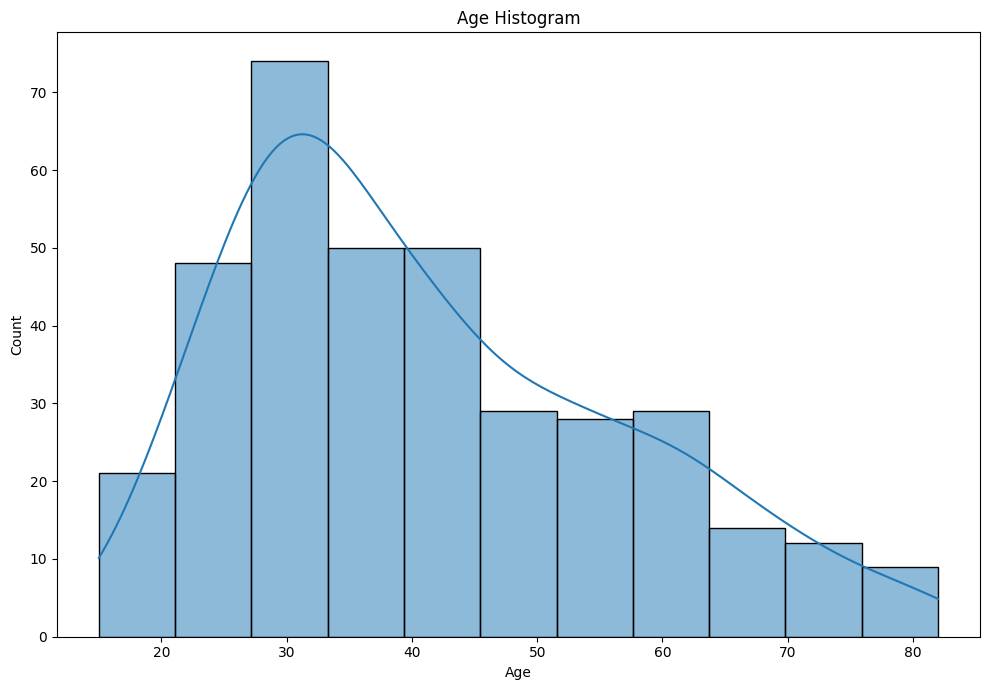

In [85]:
plt.subplots(figsize=(10, 7))
sns.histplot(data = df, x = 'Age' , kde=True)
plt.title('Age Histogram')

plt.tight_layout()
plt.show()

In [86]:
cat_cols = df.select_dtypes(include = ['object']).columns

In [87]:
cat_cols

Index(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

**CountPlot**

In [ ]:
f, ax = plt.subplots(8,2 , figsize=(15, 30))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(data= df, y= cols , ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()

**Number of recurrences by major variables**

In [89]:
def group_recurred(cols):
    cols_recurred = df.groupby([cols,'Recurred']).size().reset_index(name='count')
    
    return cols_recurred
    

In [90]:
Gender_Recurred = group_recurred(df['Gender'])
Smoking_Recurred =  group_recurred(df['Smoking'])
Thyroid_Function_Recurred = group_recurred(df['Thyroid Function'])
Physical_Examination_Recurred = group_recurred(df['Physical Examination'])
Stage_Recurred = group_recurred(df['Stage'])

In [91]:
px.bar(Gender_Recurred, y= 'count', x = 'Gender' , color = 'Recurred', barmode = 'group', title = 'Number of Recurrence by gender', text_auto = True)

In [92]:
px.bar(Smoking_Recurred, y= 'count', x = 'Smoking' , color = 'Recurred', barmode = 'group', title = 'Number of Recurrence by Smoking', text_auto = True)

In [93]:
px.bar(Thyroid_Function_Recurred, y= 'count', x = 'Thyroid Function' , color = 'Recurred', barmode = 'group', title = 'Number of Recurrence by Thyroid Function', text_auto = True)

In [94]:
px.bar(Physical_Examination_Recurred, y= 'count', x = 'Physical Examination' , color = 'Recurred', barmode = 'group', title = 'Number of Recurrence by Physical Examination', text_auto = True)

In [95]:
px.bar(Stage_Recurred, y= 'count', x = 'Stage' , color = 'Recurred', barmode = 'group', title = 'Number of Recurrence by Stage', text_auto = True)

In [96]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

**Correlation**

In [ ]:
plt.subplots(figsize = (15,15))
sns.heatmap(df.corr(),annot=True, cmap='Reds')
plt.show()

In [98]:
df.head(2)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0


# **4. Modeling**

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
from sklearn.inspection import permutation_importance

In [100]:
x= df.drop(['Recurred'],axis=1)
y= df['Recurred']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [102]:
rfc = RandomForestClassifier(n_estimators = 300 , random_state=42)
svc = SVC(random_state=42)
abc = AdaBoostClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
lgr = LogisticRegression()
xgb = XGBClassifier(random_state=42)

models = [rfc, svc, abc, gbc, lgr, xgb]

names = ["Random Forest", "Support Vector Machine", "Ada Boost",
        "Gradient Boostng", "Logistic Regression", "XGBoost"]

Random Forest accuracy: 0.9589
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        51
           1       0.95      0.91      0.93        22

    accuracy                           0.96        73
   macro avg       0.96      0.94      0.95        73
weighted avg       0.96      0.96      0.96        73



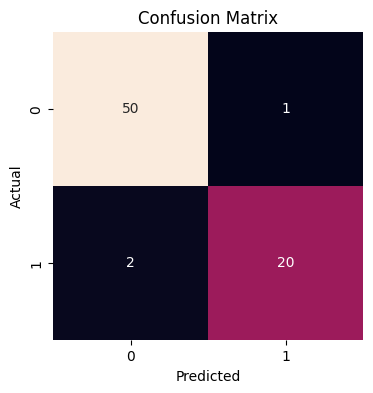

--------------------------------------------------
Support Vector Machine accuracy: 0.7945
              precision    recall  f1-score   support

           0       0.78      0.98      0.87        51
           1       0.89      0.36      0.52        22

    accuracy                           0.79        73
   macro avg       0.84      0.67      0.69        73
weighted avg       0.81      0.79      0.76        73



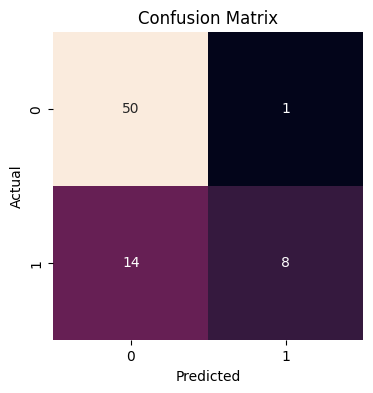

--------------------------------------------------
Ada Boost accuracy: 0.9315
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        51
           1       0.87      0.91      0.89        22

    accuracy                           0.93        73
   macro avg       0.91      0.93      0.92        73
weighted avg       0.93      0.93      0.93        73



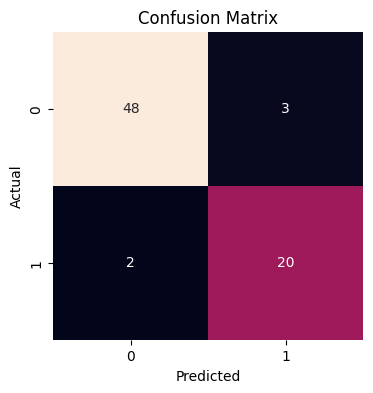

--------------------------------------------------
Gradient Boostng accuracy: 0.9178
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        51
           1       0.90      0.82      0.86        22

    accuracy                           0.92        73
   macro avg       0.91      0.89      0.90        73
weighted avg       0.92      0.92      0.92        73



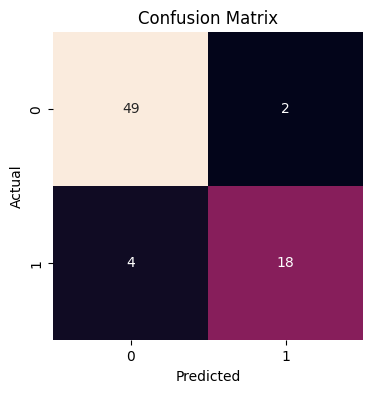

--------------------------------------------------
Logistic Regression accuracy: 0.8904
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        51
           1       0.79      0.86      0.83        22

    accuracy                           0.89        73
   macro avg       0.87      0.88      0.87        73
weighted avg       0.89      0.89      0.89        73



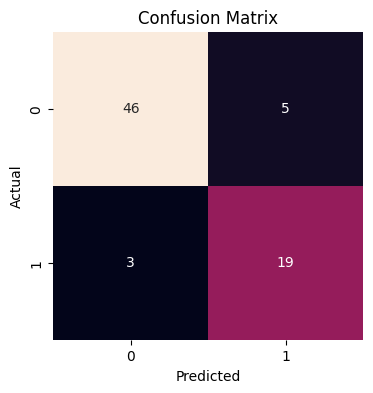

--------------------------------------------------
XGBoost accuracy: 0.9452
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        51
           1       0.91      0.91      0.91        22

    accuracy                           0.95        73
   macro avg       0.93      0.93      0.93        73
weighted avg       0.95      0.95      0.95        73



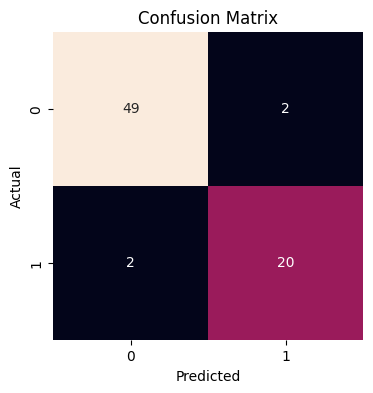

--------------------------------------------------


In [103]:
index = 0
ac = []

for name, model in enumerate(models):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    
    ac.append(accuracy)
    cm = confusion_matrix(y_test, pred)
    print(f'{names[index]} accuracy: {round(accuracy,4)}')
    print(classification_report(y_test, pred))
 
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print("-"*50)
    
    index += 1

# **5. Evaluation**

In [104]:
acc_df = pd.DataFrame({'Model': names, 'Accuracy': ac})
acc_df['Accuracy'] = acc_df['Accuracy']*100

In [105]:
px.bar(acc_df , x= 'Accuracy', y='Model', text_auto = True,  title = 'Model Accuracy', orientation='h', template='plotly_dark')

**Please leave your advice in the comments. Thank you**